## Analysis of CMOS event data for Am-241
***

### _source used: Am-241(D100)_

### 1. Initial computations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable
from skimage import io
from skimage.feature import blob_dog, blob_log, blob_doh
#from skimage.color import rgb2gray
import copy # deep copy for dictionary
import cmosdet as rd # self-written library

---
_**Listing all files/folders in working environment**_

In [2]:
ls ../Am241

Am241_ListOfFiles.txt   Am_D100_2cm_m1.txt      Am_D100_4cm_m2.txt
Am_D100_0cm_m1.avi      Am_D100_2cm_m2.avi      Am_D100_4cm_m3.avi
Am_D100_0cm_m1.avi.txt  Am_D100_2cm_m2.avi.txt  Am_D100_4cm_m3.avi.txt
Am_D100_0cm_m1.txt      Am_D100_2cm_m2.txt      Am_D100_4cm_m3.txt
Am_D100_0cm_m2.avi      Am_D100_2cm_m3.avi      Am_D100_5cm_m1.avi
Am_D100_0cm_m2.avi.txt  Am_D100_2cm_m3.avi.txt  Am_D100_5cm_m1.avi.txt
Am_D100_0cm_m2.txt      Am_D100_2cm_m3.txt      Am_D100_5cm_m1.txt
Am_D100_0cm_m3.avi      Am_D100_3cm_m1.avi      Am_D100_5cm_m2.avi
Am_D100_0cm_m3.avi.txt  Am_D100_3cm_m1.avi.txt  Am_D100_5cm_m2.avi.txt
Am_D100_0cm_m3.txt      Am_D100_3cm_m1.txt      Am_D100_5cm_m2.txt
Am_D100_1cm_m1.avi      Am_D100_3cm_m2.avi      Am_D100_5cm_m3.avi
Am_D100_1cm_m1.avi.txt  Am_D100_3cm_m2.avi.txt  Am_D100_5cm_m3.avi.txt
Am_D100_1cm_m1.txt      Am_D100_3cm_m2.txt      Am_D100_5cm_m3.txt
Am_D100_1cm_m2.avi      Am_D100_3cm_m3.avi      ImageAm241/
Am_D100_1cm_m2.avi.txt  Am_D100_3cm_m3.avi.txt  Image

_**Open and listed all the .avi files for processing**_

In [3]:
fh = open('../Am241/Am241_ListOfFiles.txt','r')
fc = fh.readlines()
fh.close()
fc # contains the names of all .avi files

['../Am241/Am_D100_0cm_m1.avi\n',
 '../Am241/Am_D100_0cm_m2.avi\n',
 '../Am241/Am_D100_0cm_m3.avi\n',
 '../Am241/Am_D100_1cm_m1.avi\n',
 '../Am241/Am_D100_1cm_m2.avi\n',
 '../Am241/Am_D100_1cm_m3.avi\n',
 '../Am241/Am_D100_2cm_m1.avi\n',
 '../Am241/Am_D100_2cm_m2.avi\n',
 '../Am241/Am_D100_2cm_m3.avi\n',
 '../Am241/Am_D100_3cm_m1.avi\n',
 '../Am241/Am_D100_3cm_m2.avi\n',
 '../Am241/Am_D100_3cm_m3.avi\n',
 '../Am241/Am_D100_4cm_m1.avi\n',
 '../Am241/Am_D100_4cm_m2.avi\n',
 '../Am241/Am_D100_4cm_m3.avi\n',
 '../Am241/Am_D100_5cm_m1.avi\n',
 '../Am241/Am_D100_5cm_m2.avi\n',
 '../Am241/Am_D100_5cm_m3.avi\n']

_**Processed each .avi files into a concantenated 2D array for each classification**_

In [4]:
a = rd.cmosdet()
b = a.process(filename='../Am241/Am_D100_0cm_m1.avi')

# vstack template for each parameters
meanAll = b['mean']
minAll = b['min']
maxAll = b['max']
medianAll = b['median']
#array3DAll = b['3D array']

#print (meanAll[0].shape)

for i,j in enumerate(fc[1:]):
    b = a.process(filename=j.replace('\n',''))
    
    meanAll = np.vstack((meanAll,b['mean']))
    minAll = np.vstack((minAll,b['min']))
    maxAll = np.vstack((maxAll,b['max']))
    medianAll = np.vstack((medianAll,b['median']))
    
    #array3DAll = np.vstack((array3DAll,b['3D array'])) # 4D stacking


CMOS radiation detector
______________________
START
______________________

----------------------------------------

*CALCULATING mean, min, max, median for each frame from a measurement movie file*

*as well as contructing 3D array of the movie*

----------------------------------------

processing file:  ../Am241/Am_D100_0cm_m1.avi
END
time : 4.7560203075408936
*RETURN {'3D array', 'mean', 'min', 'max' and 'median'}*

****************************************************************************
----------------------------------------

*CALCULATING mean, min, max, median for each frame from a measurement movie file*

*as well as contructing 3D array of the movie*

----------------------------------------

processing file:  ../Am241/Am_D100_0cm_m2.avi
END
time : 4.603463411331177
*RETURN {'3D array', 'mean', 'min', 'max' and 'median'}*

****************************************************************************
----------------------------------------

*CALCULATING mean, min, max, m

_**Plotting data distributions**_

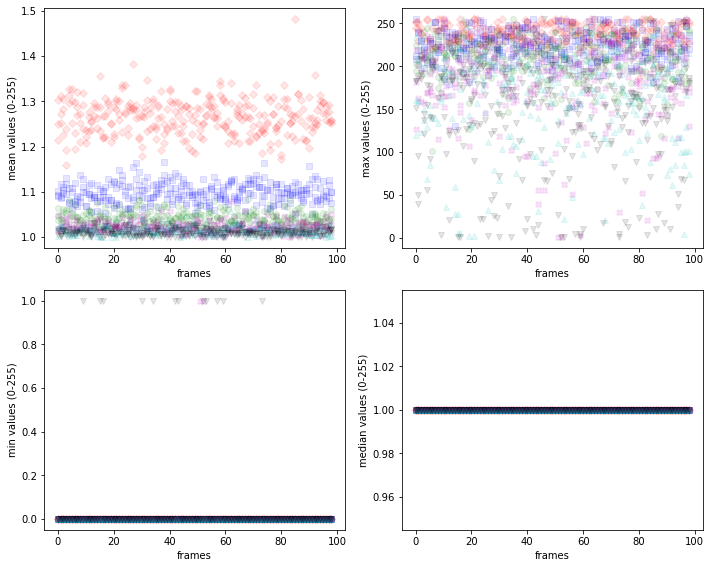

In [5]:
%matplotlib inline

plt.figure(figsize=(10,8))

markStyle = ['D','s','o','X','^','v']
markColor = ['r','b','g','m','c','k']
ctr = 0
idx = 0
# plot mean, min, median
plt.subplot(2,2,1)
for i in meanAll:
    if ctr > 2:
        ctr = 0
        idx = idx+1
    mark = markColor[idx] + markStyle[idx]
    plt.plot(i, mark, alpha=0.1)
    ctr = ctr + 1

#plt.yscale('log')
plt.ylabel('mean values (0-255)')
plt.xlabel('frames')

ctr = 0
idx = 0
plt.subplot(2,2,2)
for j in maxAll:
    if ctr > 2:
        ctr = 0
        idx = idx+1
    mark = markColor[idx] + markStyle[idx]
    plt.plot(j, mark, alpha=0.1)
    ctr = ctr + 1

#plt.yscale('log')
plt.ylabel('max values (0-255)')
plt.xlabel('frames')

ctr = 0
idx = 0
plt.subplot(2,2,3)
for k in minAll:
    if ctr > 2:
        ctr = 0
        idx = idx+1
    mark = markColor[idx] + markStyle[idx]
    plt.plot(k, mark, alpha=0.1)
    ctr = ctr + 1

#plt.yscale('log')
plt.ylabel('min values (0-255)')
plt.xlabel('frames')

ctr = 0
idx = 0
plt.subplot(2,2,4)
for l in medianAll:
    if ctr > 2:
        ctr = 0
        idx = idx+1
    mark = markColor[idx] + markStyle[idx]
    plt.plot(l, mark, alpha=0.1)
    ctr = ctr + 1

#plt.yscale('log')
plt.ylabel('median values (0-255)')
plt.xlabel('frames')

plt.tight_layout()
plt.show()

In [6]:
# last file still under object
fc[-1]

'../Am241/Am_D100_5cm_m3.avi\n'

---
### 2. Data processes and functions evaluation

Function below calculates events at image using _**Laplacian of Gaussian**_ algorithm

In [7]:
import matplotlib.image as mpimg

In [8]:
def logProcess(imageName, frameNo, editedArray, minSigma, maxSigma, numSigma,\
               thrs, ovlp, clusterSize, medValFrame):

    clusterSum = np.array([])
    clusterMax = np.array([])
    clusterArea = np.array([])
        
    # median
        
    # Laplacian of Gaussian Analyses
        
    blobs_log = blob_log(editedArray, min_sigma=minSigma, max_sigma=maxSigma, num_sigma=numSigma,\
                         threshold=thrs, overlap=ovlp)
    #print ("Frame No", frameNo)
    #print (blobs_log)

    # Extracting x,y indices of LOG value
    indexArr = blobs_log[:,:2].astype('int') # all rows, column 0 and 1 only
        
    indexRow = indexArr[:,0] # column 0 in blob_log
    indexCol = indexArr[:,1] # column 1 in blob_log
        
    # column 2 in blob_log is sigma data

    # Adding columns of pixel values to LOG array (intensity and gaussian areas)
    # --------------------------------------------------------------------------
    # 1. Getting intensity data for x,y LOG indices from original array
    # and put them in new column in new LOG array (after minus medValFrame)
    seltestData = editedArray[(indexRow,indexCol)]-medValFrame
    #print (seltestData)
    seltestData = seltestData.reshape(1,seltestData.shape[0]) # reshape as column

    # example: np.concatenate((a, b.T), axis=1)
    blobs_logAdd = np.concatenate((blobs_log,seltestData.T),axis=1) # 3  - add column 3 (max peak)
    #===========================================================================

    # 2. Adding max peak cluster value and cumulative charge cluster value
    # --------------------------------------------------------------------------
    # summing & max cluster data
    clusterLim = int(clusterSize/2)
        
    for indNo, indRowVal in enumerate(indexRow):
        sliceCluster = editedArray[indRowVal-clusterLim:indRowVal+clusterLim+1,\
                                   indexCol[indNo]-clusterLim:indexCol[indNo]+clusterLim+1]
            
        '''mpimg.imsave("../Am241/ImageAm241/"+imageName+\
                         '_'+str(frameNo)+'_'+str(indNo)+".png", sliceCluster)'''
            
        # considering only value above median value
        sliceClusterAreaVal = ((sliceCluster-medValFrame)>0)*1 # just area value
        sliceClusterVal = sliceClusterAreaVal*sliceCluster # intensity area value (already minus medValFrame)
            
            

        #clusterMax = np.append(clusterMax,sliceCluster.max()) # add max peak cluster value
        #clusterSum = np.append(clusterSum,np.sum(sliceCluster)) # add cumulative charge cluster value
            
        clusterArea = np.append(clusterArea,np.sum(sliceClusterAreaVal)) # add area value only
        clusterMax = np.append(clusterMax,sliceClusterVal.max()) # add max peak cluster value
        clusterSum = np.append(clusterSum,np.sum(sliceClusterVal)) # add cumulative charge cluster value

    #----------------------- end summing & max cluster data -------------------------
        
    clusterDataArea = clusterArea.reshape(1,clusterArea.shape[0])
    clusterDataMax = clusterMax.reshape(1,clusterMax.shape[0])
    clusterDataSum = clusterSum.reshape(1,clusterSum.shape[0])
    # example: np.concatenate((a, b.T), axis=1)
    blobs_logAdd = np.concatenate((blobs_logAdd,clusterDataMax.T),axis=1) # add column 4 (cluster max value)
    blobs_logAdd = np.concatenate((blobs_logAdd,clusterDataSum.T),axis=1) #add column 5 (cluster sum value)
    blobs_logAdd = np.concatenate((blobs_logAdd,clusterDataArea.T),axis=1) #add column 6 (cluster area sum value)
        

    # blobs_logAdd -> each row [y,x,sigma,value,charge cluster value,peak cluster value]
        
    #print (blobs_logAdd)

    return (blobs_logAdd)

In [9]:
# last file processed: Am_D100_5cm_m3.avi
b['3D array'].shape 

(99, 480, 640)

In [10]:
# Enlarging the original array
t1 = 10 # enlarging it by adding 10 pixel on x and y axes
la = b['3D array'] # la = last array

arrayCsL = np.zeros(la.shape[0]*(la.shape[1]+t1*2)*(la.shape[2]+t1*2)).\
reshape(la.shape[0],la.shape[1]+t1*2,la.shape[2]+t1*2)

In [11]:
# check the template array shape
arrayCsL.shape

(99, 500, 660)

In [12]:
# the small array area that matched measured array
arrayCsL[:,t1:-t1,t1:-t1].shape 

(99, 480, 640)

_**Ionizing event recognition and processed data compilation**_

In [13]:
fwLOG = open('../Am241/logAm241All.txt','w+')

for i,j in enumerate(fc[:]): # processing each video files
    
    imageName = j.split('/')[-1].replace('.avi\n','_')
           
    b = a.process(filename=j.replace('\n',''))

    medValFrame = b['median']
    
    #minSigma,maxSigma,thrs,ovlp = 2,3.0,1,0.1
    #minSigma,maxSigma,thrs,ovlp = 2,3,30,0.5,20
    minSigma, maxSigma, numSigma, thrs, ovlp, clusterSize = 3,6,2,6,0.05,20
    
    logCs = np.array([[0,0,0,0,0,0,0]]) # return template for logProcess
    
    for p,q in enumerate(arrayCsL): # running LOG for each frame in a video file
        
        #medValFrame = np.median(b[0][p]) # median value for each original frame
        #medValFrame = 5
        
        #print (q[t1:-t1,t1:-t1].shape)
        
        frameNo = p
        
        q[t1:-t1,t1:-t1]=copy.deepcopy(b['3D array'][p]) # assigning the smaller frame into new larger frame
        editedArray = q


        logData = logProcess(imageName, frameNo, editedArray, minSigma, maxSigma, numSigma,\
                             thrs, ovlp, clusterSize, medValFrame[p])

        logCs = np.concatenate((logCs, logData), axis=0) # concantenate data for each frame
        
        
        #print (q.shape) # Checking
        
    filenameLOG = j.replace('\n','')+'.txt'
    fwLOG.write(filenameLOG+'\n')
    np.savetxt(filenameLOG,logCs[1:], delimiter=',') # minus the initial values of the logCs template

fwLOG.close()
    


----------------------------------------

*CALCULATING mean, min, max, median for each frame from a measurement movie file*

*as well as contructing 3D array of the movie*

----------------------------------------

processing file:  ../Am241/Am_D100_0cm_m1.avi
END
time : 4.72022008895874
*RETURN {'3D array', 'mean', 'min', 'max' and 'median'}*

****************************************************************************
----------------------------------------

*CALCULATING mean, min, max, median for each frame from a measurement movie file*

*as well as contructing 3D array of the movie*

----------------------------------------

processing file:  ../Am241/Am_D100_0cm_m2.avi
END
time : 5.788487434387207
*RETURN {'3D array', 'mean', 'min', 'max' and 'median'}*

****************************************************************************
----------------------------------------

*CALCULATING mean, min, max, median for each frame from a measurement movie file*

*as well as contructing 3D

In [14]:
# Listing all the generated .txt data file
fhLOG = open('../Am241/logAm241All.txt','r')
fcLOG = fhLOG.readlines()
fhLOG.close()
fcLOG

['../Am241/Am_D100_0cm_m1.avi.txt\n',
 '../Am241/Am_D100_0cm_m2.avi.txt\n',
 '../Am241/Am_D100_0cm_m3.avi.txt\n',
 '../Am241/Am_D100_1cm_m1.avi.txt\n',
 '../Am241/Am_D100_1cm_m2.avi.txt\n',
 '../Am241/Am_D100_1cm_m3.avi.txt\n',
 '../Am241/Am_D100_2cm_m1.avi.txt\n',
 '../Am241/Am_D100_2cm_m2.avi.txt\n',
 '../Am241/Am_D100_2cm_m3.avi.txt\n',
 '../Am241/Am_D100_3cm_m1.avi.txt\n',
 '../Am241/Am_D100_3cm_m2.avi.txt\n',
 '../Am241/Am_D100_3cm_m3.avi.txt\n',
 '../Am241/Am_D100_4cm_m1.avi.txt\n',
 '../Am241/Am_D100_4cm_m2.avi.txt\n',
 '../Am241/Am_D100_4cm_m3.avi.txt\n',
 '../Am241/Am_D100_5cm_m1.avi.txt\n',
 '../Am241/Am_D100_5cm_m2.avi.txt\n',
 '../Am241/Am_D100_5cm_m3.avi.txt\n']

---
_**Creating library for all pair of files and data**_

In [15]:
prefix = '../Am241/'
suffix = '\n'

AmLOG = {}

for i, j in enumerate(fcLOG):
    
    fileArray = np.genfromtxt(j.replace(suffix,''),delimiter=',')
    AmLOG[j.replace(prefix,'').replace(suffix,'')]=fileArray
    
AmLOG

{'Am_D100_0cm_m1.avi.txt': array([[4.290e+02, 1.200e+01, 3.000e+00, ..., 1.950e+02, 2.770e+03,
         5.100e+01],
        [3.170e+02, 2.350e+02, 3.000e+00, ..., 2.030e+02, 3.330e+03,
         1.600e+02],
        [1.910e+02, 4.330e+02, 3.000e+00, ..., 1.740e+02, 2.712e+03,
         9.200e+01],
        ...,
        [2.100e+01, 2.600e+01, 3.000e+00, ..., 4.100e+01, 5.320e+02,
         9.000e+01],
        [4.780e+02, 4.670e+02, 3.000e+00, ..., 3.100e+01, 3.780e+02,
         5.000e+01],
        [1.580e+02, 4.500e+02, 3.000e+00, ..., 2.300e+01, 4.950e+02,
         9.800e+01]]),
 'Am_D100_0cm_m2.avi.txt': array([[3.150e+02, 6.320e+02, 3.000e+00, ..., 1.950e+02, 3.298e+03,
         1.460e+02],
        [2.380e+02, 5.520e+02, 3.000e+00, ..., 1.890e+02, 3.180e+03,
         9.700e+01],
        [1.600e+01, 3.160e+02, 3.000e+00, ..., 2.450e+02, 2.835e+03,
         1.280e+02],
        ...,
        [3.190e+02, 6.290e+02, 3.000e+00, ..., 2.900e+01, 3.940e+02,
         4.500e+01],
        [8.600e+01, 

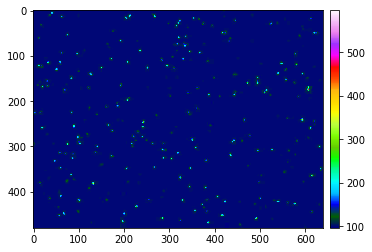

In [16]:
# sum all frames for last .avi file processed ('Am_D100_5cm_m3.avi')
sumFrame = np.sum(la[:], axis=0)

loGcoordY = AmLOG['Am_D100_5cm_m3.avi.txt'][:,0]
loGcoordX = AmLOG['Am_D100_5cm_m3.avi.txt'][:,1]

fig, (ax) = plt.subplots(1)
im = ax.imshow(sumFrame, cmap = cm.gist_ncar)# cm.gist_ncar_r; cm.nipy_spectral_r

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)

plt.colorbar(im, cax=cax)
plt.show()

fig.savefig('../Plot/Am241_Sum_of_events_at_5cm_distance.jpeg', dpi=200)
fig.savefig('../Plot/Am241_Sum_of_events_at_5cm_distance.eps', dpi=200)
plt.close()

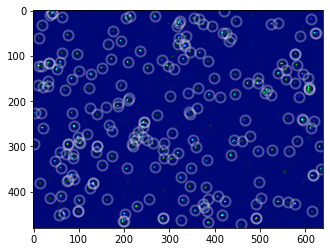

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [17]:
# sum all frames for last .avi file processed ('Am_D100_5cm_m3.avi')
# with LoG identification

fig, (ax) = plt.subplots(1)

ax.imshow(sumFrame, cmap = cm.gist_ncar)
ax.plot(loGcoordX-10, loGcoordY-10, 'wo', ms=10, markeredgewidth=2, fillstyle='none', alpha=0.3)
plt.show()

fig.savefig('../Plot/Am241_LoG_identification_of_events_at_5cm_distance.jpeg', dpi=200)
fig.savefig('../Plot/Am241_LoG_identification_events_at_5cm_distance.eps', dpi=200)
plt.close()


In [18]:
# Creating dictionary for max, sum and area data from all files
clusterData={'max':np.array([]),'sum':np.array([]),'area':np.array([])}

for i,j in enumerate(AmLOG):
    if i<18:
        clusterData['max'] = np.append(clusterData['max'],AmLOG[j][:,4])
        clusterData['sum'] = np.append(clusterData['sum'],AmLOG[j][:,5])
        clusterData['area'] = np.append(clusterData['area'],AmLOG[j][:,6])
    else:
        pass
       
    
print (clusterData['max'].max(),clusterData['sum'].max(),clusterData['area'].max())

print (clusterData['max'].min(),clusterData['max'].max())
print (clusterData['sum'].min(),clusterData['sum'].max())
print (clusterData['area'].min(),clusterData['area'].max())


255.0 14431.0 278.0
12.0 255.0
262.0 14431.0
18.0 278.0


_**Plotting the stair plots**_

In [19]:
# Building histograms for max, sum and area data for stairs plots
countsMax, binsMax = np.histogram(clusterData['max'], bins=40, range=(0,255))
countsSum, binsSum = np.histogram(clusterData['sum'], bins=100, range=(250,15000))
countsArea, binsArea = np.histogram(clusterData['area'], bins=40, range=(0,300))

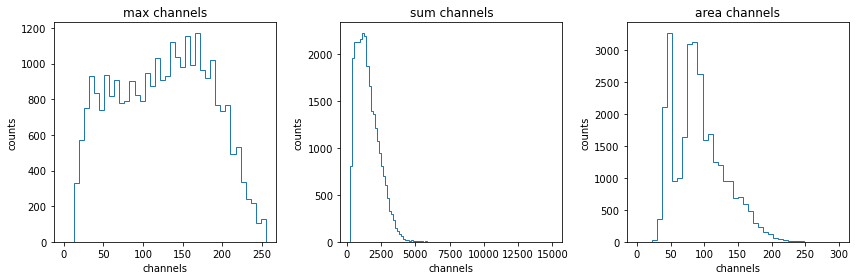

In [20]:
%matplotlib inline

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.set_title('max channels')
ax2.set_title('sum channels')
ax3.set_title('area channels')

fig.set_size_inches(12, 4)
    
ax1.stairs(countsMax, binsMax)
ax2.stairs(countsSum, binsSum)
ax3.stairs(countsArea, binsArea)


ax1.set_xlabel('channels')
ax2.set_xlabel('channels')
ax3.set_xlabel('channels')


ax1.set_ylabel('counts')
ax2.set_ylabel('counts')
ax3.set_ylabel('counts')


#ax2.set_xlim(0,8000)
#ax2.set_yscale('log')

'''ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax1.grid(True,which='both', axis='both',lw=3)
ax2.grid(True,which='both', axis='both',lw=3)
ax3.grid(True,which='both', axis='both',lw=3)'''
plt.tight_layout()
plt.show()

In [21]:
# Check the number of ionizing cluster (blob) detected by LoG for each movie file
for i,j in enumerate(AmLOG):
    print (AmLOG[j].shape[0])

5488
5669
5490
2128
2181
2145
966
931
970
488
517
529
322
356
368
249
268
219


In [22]:
# Creating dictionary of sum area intensity as well as sum blob counts against distance
binNum = 100#30
binArray = np.zeros(binNum)

sumDistance={0:binArray, 1:binArray, 2:binArray,\
            3:binArray, 4:binArray, 5:binArray}

sumBlobDistance={0:np.array([]), 1:np.array([]), 2:np.array([]),\
                 3:np.array([]), 4:np.array([]), 5:np.array([])}

keyIndex = list(sumDistance.keys())

ctr = 0
ctrIndex = 0

for i,j in enumerate(AmLOG):
    #print ('i = ',i)
    if ctr<=2: # 3 number of measurements
        #print (ctrIndex)
        
        sumBlobDistance[keyIndex[ctrIndex]]= np.append(sumBlobDistance[keyIndex[ctrIndex]],[AmLOG[j].shape[0]])
        
        countsSum, binsSum = np.histogram(AmLOG[j][:,5], bins=binNum, range=(250,15000))
        
        #sumDistance[keyIndex[ctrIndex]]= np.add(sumDistance[keyIndex[ctrIndex]],countsSum)
        sumDistance[keyIndex[ctrIndex]]= np.vstack((sumDistance[keyIndex[ctrIndex]],countsSum))
        ctr=ctr+1
        
        if ctr > 2:
            ctr=0
            ctrIndex = ctrIndex+1
    
print (sumDistance)
print (sumBlobDistance)

{0: array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.],
       [127., 351., 386., 378., 381., 409., 400., 419., 346., 284., 265.,
        241., 241., 207., 186., 174., 151., 121., 108.,  69.,  53.,  53.,
         36.,  25.,  17.,  19.,   7.,   5.,   6.,   4.,   4.,   0.,   3.,
          2.,   3.,   1.,   1.,   1.,   0.,   1.,   0.,   1.,   0.,   0.,
          1.,   0.,

_**Building of Am-241 spectrum**_

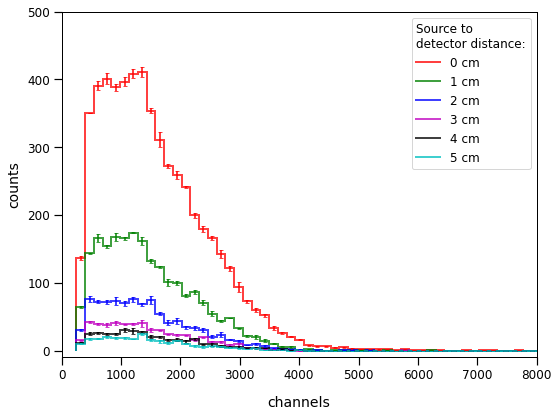

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [23]:
%matplotlib inline

binError = (binsSum[:-1]+binsSum[1:])/2
binError.shape

colors = ['r','g','b','m','k','c']

fig, (ax) = plt.subplots(1)
fig.subplots_adjust(top=0.95, right=0.95, bottom=0.15)

#ax.set_title('sum channels')

fig.set_size_inches(8, 6)
for item in (['right','left','top','bottom']):
    ax.spines[item].set_linewidth(1)

for i in sumDistance:
    
    #countsSum, binsSum = np.histogram(sumDistance[i], bins=75)

    err1 = np.std(sumDistance[i][1:,:], axis=0)/2
    ax.stairs(np.average(sumDistance[i][1:,:], axis=0), binsSum,\
              color=colors[i],alpha=0.75, lw=2, label=str(i)+' cm')
    ax.errorbar(binError,np.average(sumDistance[i][1:,:], axis=0),yerr=err1,\
                ecolor=colors[i],ls='',lw=2,alpha=0.75,capsize=2,capthick=1)

ax.set_xlabel('channels', size=14, weight = 500, labelpad=14)
ax.set_ylabel('counts', size=14,  weight = 500, labelpad=6)

ax.tick_params(which='major', length=8, width=1.2, labelsize=12)
ax.tick_params(which='minor', length=3, width=1.1)

ax.set_xlim(0,8000)
ax.set_ylim(-10,500)
#ax.set_yscale('log')

#ax.grid(True,which='both', axis='both',lw=1)
leg=ax.legend(title='Source to\ndetector distance:',title_fontsize=12,fontsize=12)
leg._legend_box.align='left'
plt.show()

fig.savefig('../Plot/Spectrum_Am241_all_distance.jpeg', dpi=200)
fig.savefig('../Plot/Spectrum_Am241_all_distance.eps', dpi=200)
plt.close()

In [24]:
from matplotlib.ticker import FormatStrFormatter, FuncFormatter

_**Total blob counts with distance (testing linearity)**_

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


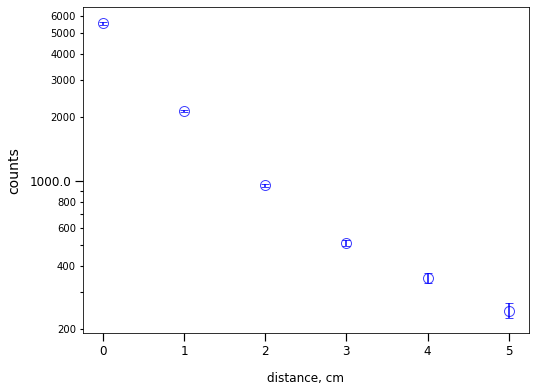

In [25]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_yscale('log')
#ax.set_ylim(200,6000)

def func(x, pos):
    ticks = [200, 400, 600, 800, 2000, 3000, 4000, 5000, 6000]
    if np.any(np.isclose(np.ones_like(ticks)*x, ticks)):
        return f"{x:g}"
    else:
        return ""
    
for i in sumBlobDistance:
    
    #countsSum, binsSum = np.histogram(sumDistance[i], bins=75)

    err1 = (np.std(sumBlobDistance[i]))
    ax.plot(i,np.average(sumBlobDistance[i]),'o',color='blue',\
            alpha=0.75,fillstyle='none',ms=10)
    ax.errorbar(i,np.average(sumBlobDistance[i]),yerr=err1,\
                ecolor='blue',ls='',lw=2,alpha=0.75,capsize=4,capthick=1)
    
ax.set_xlabel('distance, cm', size=12, weight = 500, labelpad=14)
ax.set_ylabel('counts', size=14,  weight = 500, labelpad=8)

ax.tick_params(which='major', length=8, width=1.2, labelsize=12)


ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_minor_formatter(FuncFormatter(func))
ax.tick_params('y', which='minor', length=3, width=1.1, labelsize=10)

fig.savefig('../Plot/Am241_count_vs_distance.jpeg', dpi=200)
fig.savefig('../Plot/Am241_count_vs_distance.eps', dpi=200)

plt.show()

_**Blob counts at certain channel with distance (testing linearity)**_

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


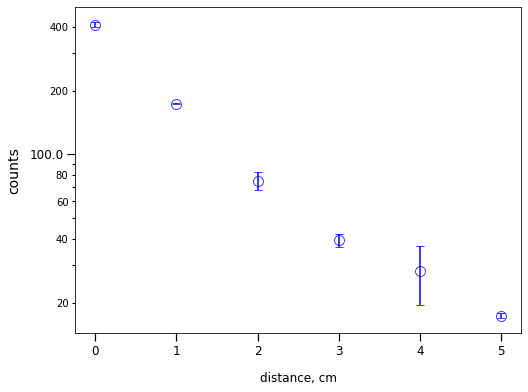

In [26]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_yscale('log')
#ax.set_ylim(200,6000)

def func(x, pos):
    ticks = [20, 40, 60, 80, 100, 200, 400]
    if np.any(np.isclose(np.ones_like(ticks)*x, ticks)):
        return f"{x:g}"
    else:
        return ""
    
pos = 6 # channel numer in previous spectrum

for i in sumDistance:
    
    #countsSum, binsSum = np.histogram(sumDistance[i], bins=75)

    err1 = (np.std(sumDistance[i][1:,pos]))
    ax.plot(i,np.average(sumDistance[i][1:,pos]), 'o',color='blue',\
            alpha=0.75,fillstyle='none',ms=10)
    ax.errorbar(i,np.average(sumDistance[i][1:,pos]),yerr=err1,\
                ecolor='blue',ls='',lw=2,alpha=0.75,capsize=4,capthick=1)
    
ax.set_xlabel('distance, cm', size=12, weight = 500, labelpad=14)
ax.set_ylabel('counts', size=14,  weight = 500, labelpad=8)

ax.tick_params(which='major', length=8, width=1.2, labelsize=12)


ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_minor_formatter(FuncFormatter(func))
ax.tick_params('y', which='minor', length=3, width=1.1, labelsize=10)

fig.savefig('../Plot/Am241_countBin_vs_distance.jpeg', dpi=200)
fig.savefig('../Plot/Am241_countBin_vs_distance.eps', dpi=200)

plt.show()

### Curve fitting

In [27]:
# importing the library
from scipy.optimize import curve_fit

In [28]:
distance = np.array([0,1,2,3,4,5])

In [29]:
sumBlobDistance

{0: array([5488., 5669., 5490.]),
 1: array([2128., 2181., 2145.]),
 2: array([966., 931., 970.]),
 3: array([488., 517., 529.]),
 4: array([322., 356., 368.]),
 5: array([249., 268., 219.])}

In [30]:
# Building array for sumBlobDistance average value and error
avgBlob=[]
errBlob =[]

for i in sumBlobDistance:

    avgBlob = avgBlob + [np.average(sumBlobDistance[i])]
    errBlob = errBlob + [np.std(sumBlobDistance[i])]
    
avgBlob = np.array(avgBlob)

In [31]:
# x-axis array for fitting functions
distanceM = np.linspace(0,5,100)
# Square root law
distancesq2 = np.array([1,2,3,4,5])
ySq = avgBlob[1]*(1/distancesq2)**2

In [32]:
# Fitting functions

def linattn(t, I0, mu): # Linear
    return (I0*np.exp(-mu*t))

def linattnT(t, I0, mu, A0, A1, A2): # Taylor
    Bt = A0*np.exp(-A1*mu*t)+((1-A0)*np.exp(-A2*mu*t))
    return (Bt*I0*np.exp(-mu*t))

def linattnB(t, I0, mu, B1, B2): # Berger
    Bb = 1+B1*mu*t*np.exp(B2*mu*t)
    return (Bb*I0*np.exp(-mu*t))


_**Fitting total blob counts with distance**_

In [33]:
param, param_cov = curve_fit(linattn, distance, avgBlob)
paramT, param_covT = curve_fit(linattnT, distance, avgBlob)
paramB, param_covB = curve_fit(linattnB, distance, avgBlob)

yS = linattn(distanceM, param[0], param[1])
yST = linattn(distanceM, paramT[0], paramT[1])
ySB = linattn(distanceM, paramB[0], paramB[1])

/tmp/ipykernel_4396/365365231.py:7: RuntimeWarning: overflow encountered in exp
  Bt = A0*np.exp(-A1*mu*t)+((1-A0)*np.exp(-A2*mu*t))
/tmp/ipykernel_4396/365365231.py:7: RuntimeWarning: invalid value encountered in multiply
  Bt = A0*np.exp(-A1*mu*t)+((1-A0)*np.exp(-A2*mu*t))
/tmp/ipykernel_4396/365365231.py:8: RuntimeWarning: overflow encountered in exp
  return (Bt*I0*np.exp(-mu*t))
/home/megatharun/mambaforge/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_4396/365365231.py:11: RuntimeWarning: overflow encountered in exp
  Bb = 1+B1*mu*t*np.exp(B2*mu*t)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


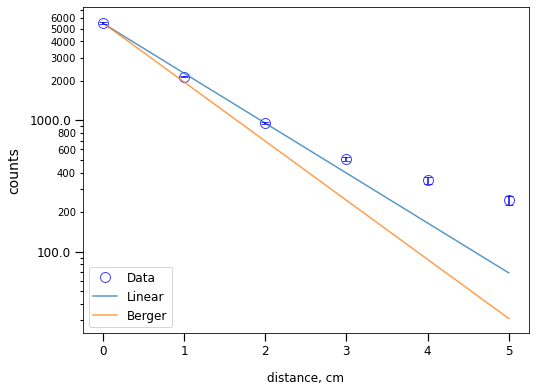

In [34]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_yscale('log')
#ax.set_ylim(200,6000)

def func(x, pos):
    ticks = [200, 400, 600, 800, 2000, 3000, 4000, 5000, 6000]
    if np.any(np.isclose(np.ones_like(ticks)*x, ticks)):
        return f"{x:g}"
    else:
        return ""

ax.plot(distance,avgBlob, 'bo',label = 'Data',\
            alpha=0.75,fillstyle='none',ms=10)
#ax.plot(distancesq2,ySq, 'ro',alpha=0.75, label = 'DataSq')

ax.plot(distanceM,yS, alpha=0.75, label='Linear')
#ax.plot(distanceM,yST, alpha=0.75, label = 'Taylor')
ax.plot(distanceM,ySB, alpha=0.75, label='Berger')

ax.errorbar(distance,avgBlob,yerr=errBlob,ecolor='blue',ls='',lw=2,alpha=0.75,capsize=4,capthick=1)

ax.set_xlabel('distance, cm', size=12, weight = 500, labelpad=14)
ax.set_ylabel('counts', size=14,  weight = 500, labelpad=8)

ax.tick_params(which='major', length=8, width=1.2, labelsize=12)


ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_minor_formatter(FuncFormatter(func))
ax.tick_params('y', which='minor', length=3, width=1.1, labelsize=10)

leg = ax.legend(loc ="lower left", fontsize=12);

fig.savefig('../Plot/Am241_count_vs_distance_with_fitting.jpeg', dpi=200)
fig.savefig('../Plot/Am241_count_vs_distance_with_fitting.eps', dpi=200)

plt.show()

_**Fitting blob counts at certain channel with distance**_

In [35]:
errCh = np.array([])
avgCh = np.array([])

pos=6

for i in sumDistance:
    
    avgCh = np.append(avgCh,np.average(sumDistance[i][1:,:], axis=0)[pos])
    errCh = np.append(errCh,(np.std(sumDistance[i][1:,:], axis=0)/2)[pos])

In [36]:
paramCh, param_covCh = curve_fit(linattn, distance, avgCh)
paramTCh, param_covTCh = curve_fit(linattnT, distance, avgCh)
paramBCh, param_covBCh = curve_fit(linattnB, distance, avgCh)

ySCh = linattn(distanceM, paramCh[0], paramCh[1])
ySTCh = linattn(distanceM, paramTCh[0], paramTCh[1])
ySBCh = linattn(distanceM, paramBCh[0], paramBCh[1])

/tmp/ipykernel_4396/365365231.py:7: RuntimeWarning: overflow encountered in exp
  Bt = A0*np.exp(-A1*mu*t)+((1-A0)*np.exp(-A2*mu*t))
/tmp/ipykernel_4396/365365231.py:7: RuntimeWarning: invalid value encountered in multiply
  Bt = A0*np.exp(-A1*mu*t)+((1-A0)*np.exp(-A2*mu*t))
/tmp/ipykernel_4396/365365231.py:8: RuntimeWarning: overflow encountered in exp
  return (Bt*I0*np.exp(-mu*t))


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


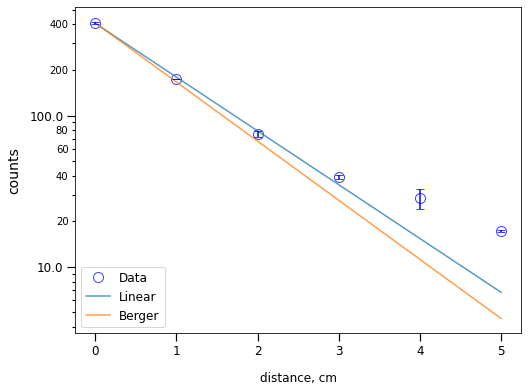

In [37]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_yscale('log')
#ax.set_ylim(200,6000)

def func(x, pos):
    ticks = ticks = [20, 40, 60, 80, 100, 200, 400]
    if np.any(np.isclose(np.ones_like(ticks)*x, ticks)):
        return f"{x:g}"
    else:
        return ""

ax.plot(distance,avgCh, 'bo',label = 'Data',\
            alpha=0.75,fillstyle='none',ms=10)
#ax.plot(distancesq2,ySq, 'ro',alpha=0.75, label = 'DataSq')

ax.plot(distanceM,ySCh, alpha=0.75, label='Linear')
#ax.plot(distanceM,ySTCh, alpha=0.75, label = 'Taylor')
ax.plot(distanceM,ySBCh, alpha=0.75, label='Berger')

ax.errorbar(distance,avgCh,yerr=errCh,ecolor='blue',ls='',lw=2,alpha=0.75,capsize=4,capthick=1)

ax.set_xlabel('distance, cm', size=12, weight = 500, labelpad=14)
ax.set_ylabel('counts', size=14,  weight = 500, labelpad=8)

ax.tick_params(which='major', length=8, width=1.2, labelsize=12)


ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_minor_formatter(FuncFormatter(func))
ax.tick_params('y', which='minor', length=3, width=1.1, labelsize=10)

leg = ax.legend(loc ="lower left", fontsize=12);

fig.savefig('../Plot/Am241_countBin_vs_distance_with_fitting.jpeg', dpi=200)
fig.savefig('../Plot/Am241_countBin_vs_distance_with_fitting.eps', dpi=200)

plt.show()

## FINISH